<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/master/03-Deep-Learning/notebooks/06-CNN-Practicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Redes Neuronales Convoluciones (CNN)</h1>

En esta notebook practicaremos el uso de las redes CNN en varios conjuntos de datos y realizaremos algunas comparaciones con las redes MLP.

Verifiquemos que el entorno de ejecución en Colab sea GPU

In [1]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

GPU presente en: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 1. MNIST Fashion

## El conjunto de datos

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>

Creamos un diccionario con los nombres de las clases

In [3]:
prendas_list = ['Camiseta','Pantalones','Suéter','Vestido','Abrigo','Sandalia','Camisa','Sneaker','Bolsa','Botín']

prendas = dict(enumerate(prendas_list))
prendas

{0: 'Camiseta',
 1: 'Pantalones',
 2: 'Suéter',
 3: 'Vestido',
 4: 'Abrigo',
 5: 'Sandalia',
 6: 'Camisa',
 7: 'Sneaker',
 8: 'Bolsa',
 9: 'Botín'}

Cargamos del dataset

In [4]:
from keras.datasets import fashion_mnist

(X_train, y_train_classes), (X_test, y_test_classes) = fashion_mnist.load_data()

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train_classes.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test_classes.shape}")

4422102/4422102 [==============================] - 1s 0us/step
X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


## Separación en Entrenamiento, Validación y Prueba

Obtenemos las clases como vectores *one-hot*

In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train_classes, num_classes) #Codificación one-hot de etiquetas
y_test = to_categorical(y_test_classes, num_classes)

Normalizamos

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Dividimos en train-validation-split

In [7]:
# Las primeras 50,000 muestras para entrenamiento
X_train = X_train[:-10000]
y_train = y_train[:-10000]

# Reserva las últimas 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 50000
Validation size: 10000
Test size: 10000


Obtenemos una versión *aplanada* del dataset. Cada imagen de 28$\times$28 ahora es un vector de 784 componentes.

In [8]:
X_train_flatten = X_train.reshape(-1, 784)
X_val_flatten = X_val.reshape(-1, 784)
X_test_flatten = X_test.reshape(-1, 784)

In [9]:
print(X_train.shape,X_val.shape,X_test.shape)
print(X_train_flatten.shape,X_val_flatten.shape,X_test_flatten.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000, 784) (10000, 784) (10000, 784)


Visualicemos algunas imágenes

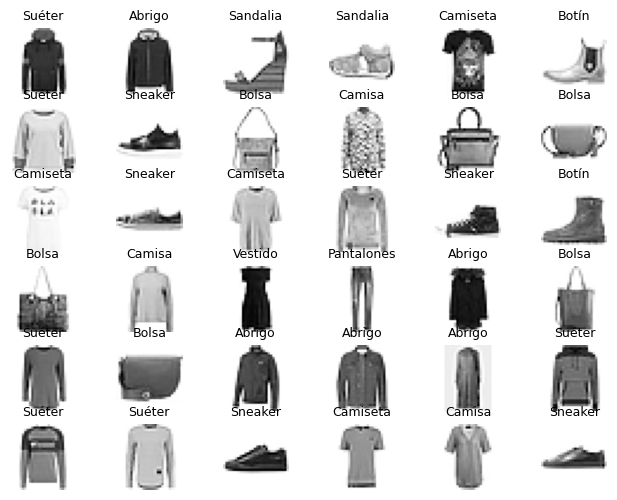

In [10]:
# tamaño del conjunto de instancias
m = y_train.shape[0]

# Elegimos algunas instancias al azar para mostrar
random_idxs = np.random.choice(m, 36, replace=False)
images = X_train[random_idxs, :, :].reshape((6,6,28,28))
images_labels = y_train_classes[random_idxs].reshape((6,6))

# visualización de las imágenes
fig, axs = plt.subplots(6,6,figsize=(8,6))
for i in range(6):
    for j in range(6):
        axs[i,j].imshow(images[i,j], cmap='Greys')
        axs[i,j].set_title(prendas[images_labels[i,j]], fontsize=9)
        axs[i,j].axis('off')
fig.show()

## ⭕ Práctica 1

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.

In [11]:
# model_mlp = ...

##Construcción del modelo

In [12]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model_mlp = keras.Sequential()


model_mlp.add(Dense(784, activation='relu',input_shape=[X_train_flatten.shape[1]])),
model_mlp.add(Dense(256, activation='tanh'))
model_mlp.add(Dense(10, activation='softmax'))

"""
tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
"""
model_mlp.compile(loss='CategoricalCrossentropy', optimizer='RMSprop', metrics=['accuracy'])
#Imagenes

#----- Entremamos el modelo ------
history = model_mlp.fit(X_train_flatten, y_train, validation_data=(X_val_flatten, y_val), epochs=50, verbose=1)





Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 0.5119 - accuracy: 0.8110 - val_loss: 0.4425 - val_accuracy: 0.8364
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3787 - accuracy: 0.8602 - val_loss: 0.3406 - val_accuracy: 0.8680
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3415 - accuracy: 0.8751 - val_loss: 0.3038 - val_accuracy: 0.8843
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3180 - accuracy: 0.8817 - val_loss: 0.2951 - val_accuracy: 0.8928
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3017 - accuracy: 0.8879 - val_loss: 0.3146 - val_accuracy: 0.8838
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2885 - accuracy: 0.8932 - val_loss: 0.3003 - val_accuracy: 0.8896
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2761 - accuracy: 0.8988 - val_loss: 0.2962 - val_accuracy:

In [15]:
loss, accuracy = model_mlp.evaluate(X_test_flatten, y_test, verbose=2)


313/313 - 1s - loss: 0.4142 - accuracy: 0.8874 - 665ms/epoch - 2ms/step


Veamos las curvas de entrenamiento

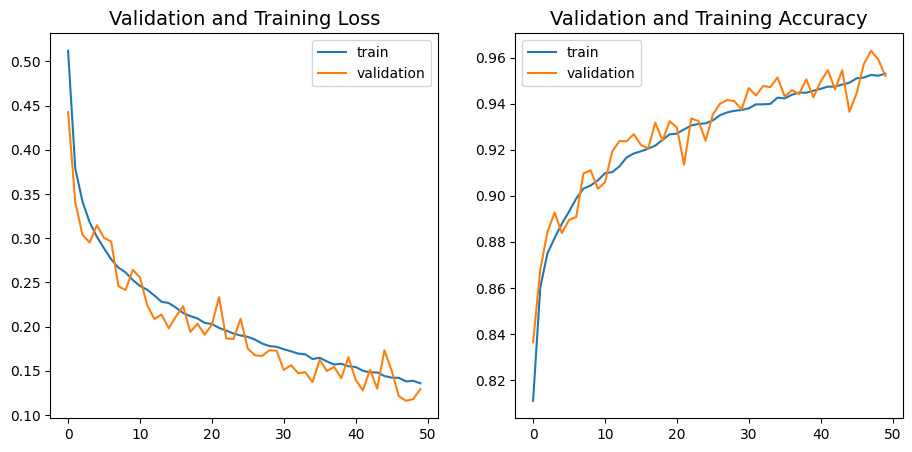

In [16]:

# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.title("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()



313/313 [==============================] - 1s 2ms/step


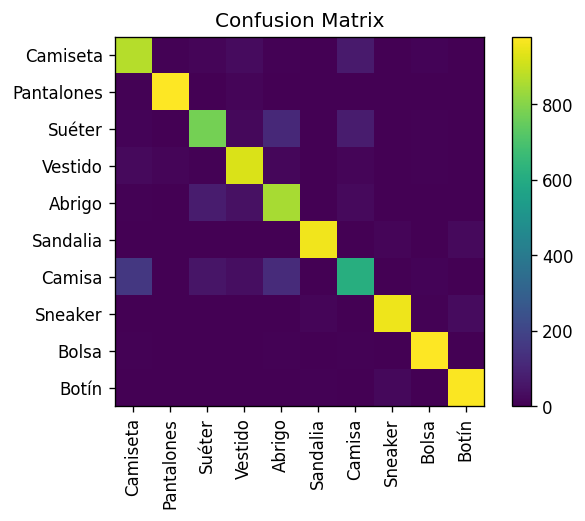

In [17]:
from sklearn.metrics import confusion_matrix

y_hat = model_mlp.predict(X_test_flatten)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## ⭕ Práctica 2

Entrenar una red CNN para la misma tarea de clasificación. Puedes escoger libremente el número de capas, neuronas, dropout, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.
* Compara el rendimiento de la MLP y la CNN.

In [ ]:
# model_cnn =

In [18]:
"""
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',   #capa convolucional, 32 filtros(imagenes) cada uno de 3x3
                           input_shape=(28, 28, 1)),#valor fijo de 1 canales

    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #softmax por default para multiclase
])

model_cnn.compile(loss='CategoricalCrossentropy', optimizer='adagrad', metrics=['accuracy'])

"""
#Modelo 1  padding mejora
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding="valid", #padding agregar ceros al borde
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.compile(loss='CategoricalCrossentropy',
            optimizer='RMSprop',
            metrics=['accuracy'])






In [19]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 784)              

In [20]:
#----- Entremamos el modelo ------
history = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1,batch_size=128)



Epoch 1/30
391/391 [==============================] - 9s 8ms/step - loss: 0.5384 - accuracy: 0.8012 - val_loss: 0.3492 - val_accuracy: 0.8735
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3165 - accuracy: 0.8832 - val_loss: 0.2633 - val_accuracy: 0.9028
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 0.2616 - accuracy: 0.9013 - val_loss: 0.2231 - val_accuracy: 0.9210
Epoch 4/30
391/391 [==============================] - 3s 7ms/step - loss: 0.2273 - accuracy: 0.9146 - val_loss: 0.1954 - val_accuracy: 0.9263
Epoch 5/30
391/391 [==============================] - 3s 7ms/step - loss: 0.2000 - accuracy: 0.9256 - val_loss: 0.2598 - val_accuracy: 0.9025
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 0.1736 - accuracy: 0.9347 - val_loss: 0.1357 - val_accuracy: 0.9493
Epoch 7/30
391/391 [==============================] - 3s 7ms/step - loss: 0.1508 - accuracy: 0.9440 - val_loss: 0.1466 - val_accuracy: 0.9463
Epoch 

In [21]:
loss, accuracy = model_cnn.evaluate(X_test, y_test, verbose=2)


313/313 - 1s - loss: 0.6532 - accuracy: 0.9122 - 998ms/epoch - 3ms/step


Veamos las curvas de entrenamiento

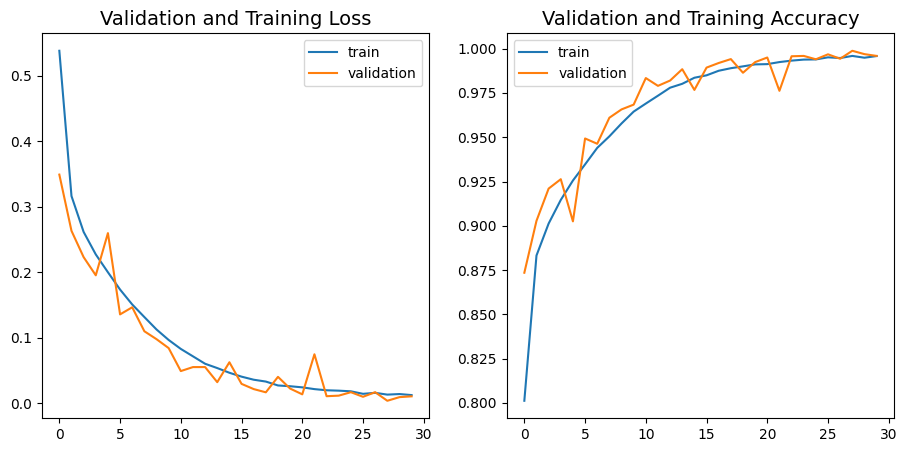

In [22]:

# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.title("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()



313/313 [==============================] - 1s 2ms/step


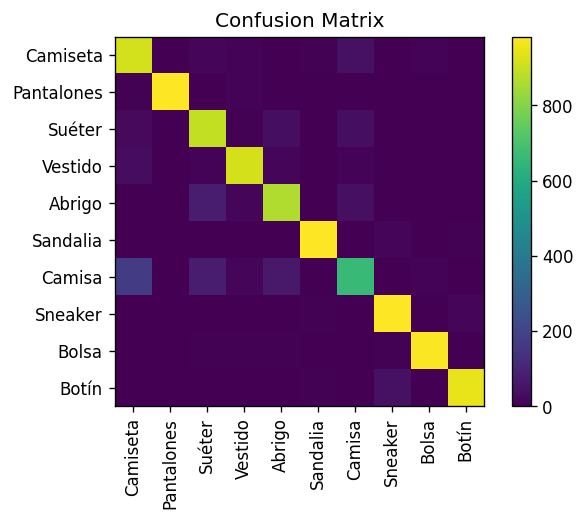

In [23]:
from sklearn.metrics import confusion_matrix

y_hat = model_cnn.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Tarea 2: X-rays
































Este conjunto de entrenamiento consta de 5886 imágenes de rayos X de torax divididas en dos clases: Pneumonia y Normal.

Estas imágenes de radiografía de tórax son de pacientes pediátricos de uno a cinco años del Centro Médico de Mujeres y Niños de Guangzhou, Guangzhou. Todas las radiografías de tórax se realizaron como parte de la atención clínica rutinaria de los pacientes.

Para el análisis de las imágenes, se sometieron inicialmente a un control de calidad mediante la eliminación de todas las exploraciones de baja calidad o ilegibles. A continuación, los diagnósticos de las imágenes fueron calificados por dos médicos expertos antes de ser autorizados para el entrenamiento del sistema de IA. Para tener en cuenta cualquier error de clasificación, el conjunto de evaluación también fue revisado por un tercer experto.

Este conjunto de datos se puede encontrar en [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

La copia con la que trabajaremos se puede bajar de Google Drive: https://drive.google.com/file/d/1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI/view?usp=sharing

In [ ]:
!pip install -q gdown

In [ ]:
!gdown 1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI

Extraemos los archivos

In [ ]:
from zipfile import ZipFile

fname = '/content/x-rays.zip'

with ZipFile(fname, 'r') as myzip:
    myzip.extractall()
    print('Listo')

Definimos las rutas de los archivos

In [ ]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

In [ ]:
import pathlib
import PIL

train_path = pathlib.Path(train_dir)
val_path = pathlib.Path(validation_dir)
test_path = pathlib.Path(test_dir)

normal_vis = list(train_path.glob("NORMAL/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Normal")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

normal_vis = list(train_path.glob("PNEUMONIA/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Pneumonia")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

In [ ]:
import os, shutil

print('Para entrenamiento:')
train_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(train_normal))))
train_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(train_pneumonia))))

print('\nPara validación:')
validation_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(validation_normal))))
validation_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(validation_pneumonia))))

print('\nPara prueba:')
test_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(test_normal))))
test_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(test_pneumonia))))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

In [ ]:
for data_batch, labels_batch in validation_generator:
    print('Dimensiones del batch de imágenes:', data_batch.shape)
    print('Dimensiones del batch de las etiquetas:', labels_batch.shape)
    break

##  El modelo

In [ ]:
# model =

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=163,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=1)